# Automated Nanoparticle Analysis Using AI Prompt Engineering

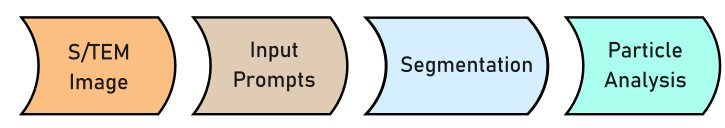

### (A) S/TEM Image
#### Load the libraries and helper functions 

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from velox_preprocess_dcfi import velox_emd
from detector import object_detection, segmentation, segmentation_fast
from sam_visualize import visualize_mask
from analysis import particle_analysis

 #### Load Velox file (S/TEM image)

Detector : HAADF
Mag : 225000
Scan size :2048
Pixel size (nm) : 0.201


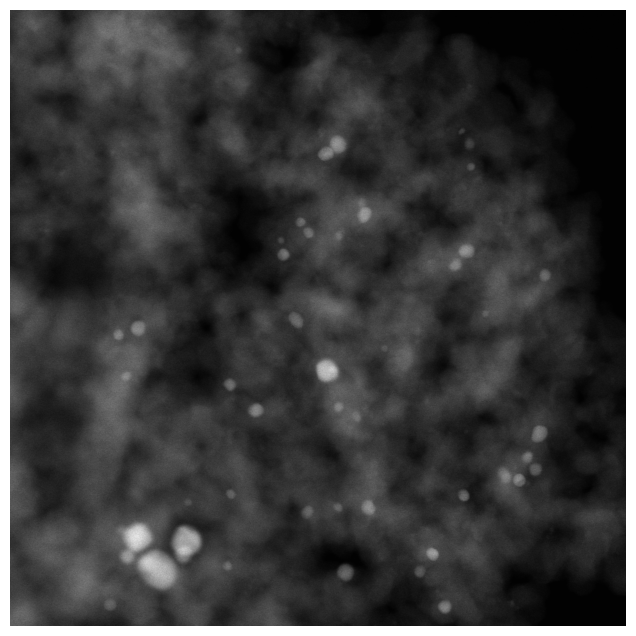

In [18]:
# Path to the folder Where the Velox ".emd" file is located
path_to_velox_data =''

# Get the S/TEM image and pixel Size
img_x, img, pixel_size = velox_emd(path_to_velox_data)

### (B) Box Prompt
#### Run object detection model on the S/TEM image


0: 1024x1024 65 Particles, 104.0ms
Speed: 18.6ms preprocess, 104.0ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


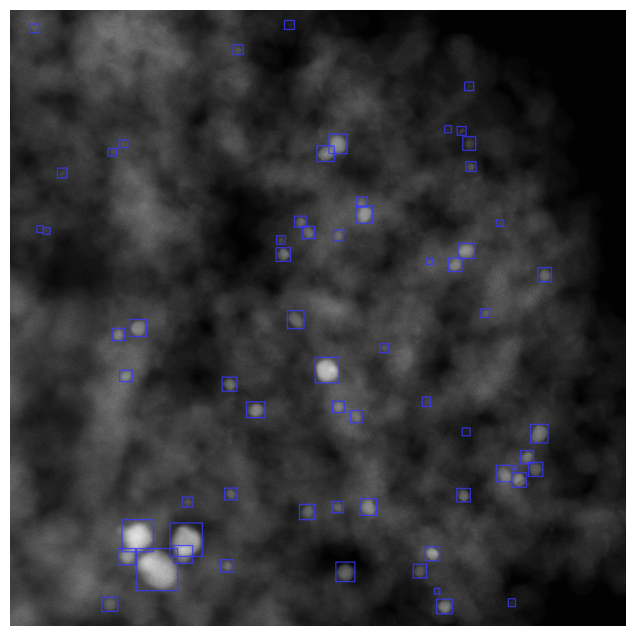

CPU times: total: 2.36 s
Wall time: 2.63 s


In [20]:
# Path to the folder Where the Velox ".emd" file is located
path_to_image = '.png'

# Get the bounding boxes:
boxes = object_detection(img_x, img, path_to_image, img_size = 1024, pred_score = 0.2, overlap_thr = 0.2, save = False)

### (C) Segmentation
#### Run segmentation model using the box prompts from the object detection model

In [72]:
masks = segmentation(img_x, boxes)

CPU times: total: 5.09 s
Wall time: 5.94 s


#### Visualize Segmentation 

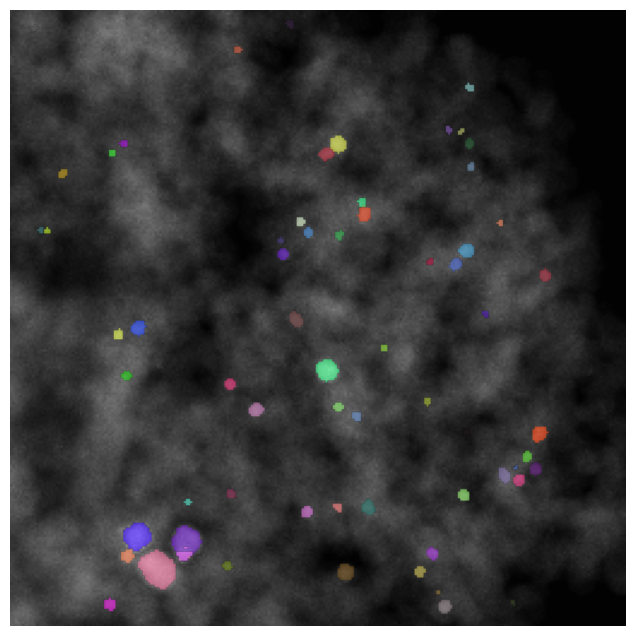

CPU times: total: 3.69 s
Wall time: 5.4 s


In [73]:
# Path to save segmented image
path_to_imageseg = '.png'

visualize_mask(masks, img, path_to_imageseg, img_size = (256, 256), save = False)

### (D) Analysis
#### Measure particle diameter and area

Mean Diameter : 8.01 nm
Mean Area : 61.48 nm²


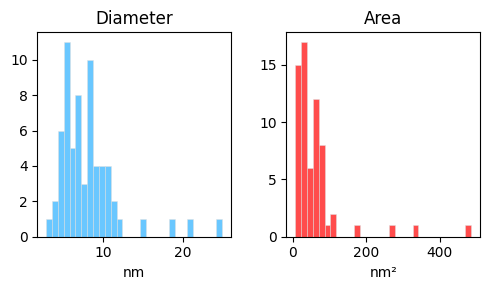

CPU times: total: 3.06 s
Wall time: 4.52 s


In [74]:
# Path to save the output Excel file
path_to_csv_file = '.csv'

# Histogram of particle diameter and area
diameter, area = particle_analysis(masks, boxes, pixel_size, path_to_csv_file, save = False)